In [131]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
pd.options.display.float_format = '{:.0f}'.format
hhs = pd.read_csv("../dataset/HHS_Provider_Relief_Fund.csv")
hhs.head(3)

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Provider Name,State,City,Payment
0,BRANDON ASTIN DMD LLC,AK,ANCHOR POINT,"$113,026"
1,ELIZABETH WATNEY,AK,ANCHOR POINT,$724
2,A HAND UP BEHAVIOR SERVICES,AK,ANCHORAGE,"$1,191"


In [146]:
hhs.shape

(412702, 4)

In [147]:
hhs.dtypes

Provider Name    object
State            object
City             object
Payment          object
dtype: object

In [148]:
hhs['Payment'] = hhs['Payment'].str.replace('[$,]','')

<ipython-input-148-92b9f70edfc1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  hhs['Payment'] = hhs['Payment'].str.replace('[$,]','')


In [149]:
hhs['Payment'] = hhs['Payment'].str.strip()

In [150]:
hhs['Payment'] = hhs['Payment'].astype('float64')

In [151]:
hhs.head(3)

,Provider Name,State,City,Payment
0,BRANDON ASTIN DMD LLC,AK,ANCHOR POINT,113026
1,ELIZABETH WATNEY,AK,ANCHOR POINT,724
2,A HAND UP BEHAVIOR SERVICES,AK,ANCHORAGE,1191


In [152]:
hhs.dtypes

Provider Name     object
State             object
City              object
Payment          float64
dtype: object

In [153]:
hhs.isnull().sum()

Provider Name        0
State                0
City                 0
Payment          19486
dtype: int64

In [154]:
hhs['Payment'].fillna(value=0.0,inplace=True)

In [144]:
hhs['State'].value_counts().head(12)

CA    50399
NY    33092
TX    31742
FL    28484
NJ    16779
IL    15973
PA    15789
MI    13864
OH    13434
MA    11063
GA    10590
NC     9734
Name: State, dtype: int64

In [157]:
#States with highest payment
hhs.sort_values('Payment',ascending=False)[['State','Payment']].head(10)

,State,Payment
279834,NY,1202842912
280979,NY,631069436
290784,NY,467880460
255597,NV,430824536
279977,NY,427154635
289641,NY,409079102
240590,NJ,401192239
61760,CA,387915656
56082,CA,383521496
136502,IL,315963153


In [158]:
#Cities with highest payment
hhs.sort_values('Payment',ascending=False)[['City','Payment']].head(10)

,City,Payment
279834,NEW YORK,1202842912
280979,NEW YORK,631069436
290784,YONKERS,467880460
255597,LAS VEGAS,430824536
279977,NEW YORK,427154635
289641,WESTBURY,409079102
240590,HACKENSACK,401192239
61760,STANFORD,387915656
56082,SAN FRANCISCO,383521496
136502,DOWNERS GROVE,315963153


In [159]:
#Providers with highest payment
hhs.sort_values('Payment',ascending=False)[['Provider Name','Payment']].head(10)

,Provider Name,Payment
279834,NEW YORK CITY HEALTH AND HOSPITALS CORPORATION,1202842912
280979,THE NEW YORK AND PRESBYTERIAN HOSPITAL,631069436
290784,MONTEFIORE MEDICAL CENTER,467880460
255597,DIGNITY HEALTH,430824536
279977,NYU LANGONE HOSPITALS,427154635
289641,LONG ISLAND JEWISH MEDICAL CENTER,409079102
240590,HMH HOSPITALS CORPORATION,401192239
61760,STANFORD HEALTH CARE,387915656
56082,UNIVERSITY OF CALIFORNIA SAN FRANCISCO,383521496
136502,ADVOCATE HEALTH AND HOSPITALS CORPORATION,315963153


Text(0.5, 1.0, 'States')

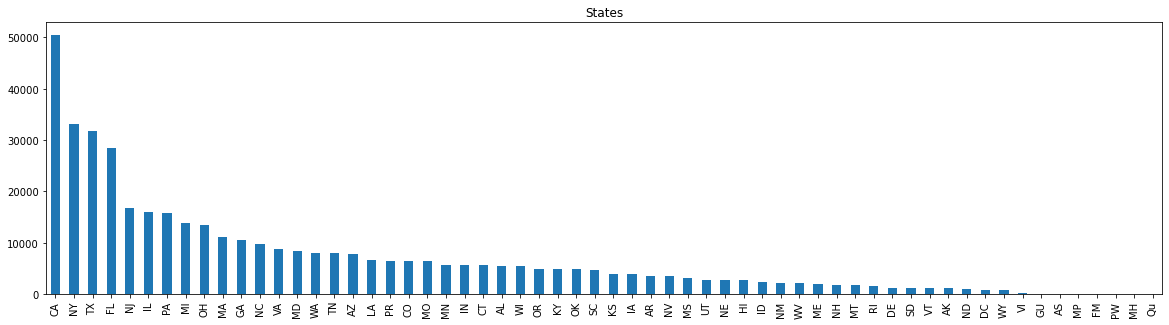

In [97]:
plt.figure(figsize=(20,5))
hhs['State'].value_counts().plot(kind='bar')
plt.title("States")

In [98]:
hhs.groupby(by='State').agg({'City': ['nunique', 'max']})

City                  
      nunique               max
State                          
AK         61           YAKUTAT
AL        339              YORK
AR        231         YELLVILLE
AS         38          XENIA OH
AZ        186              YUMA
CA       1079      YUCCA VALLEY
CO        276              YUMA
CT        254        YALESVILLE
DC         11         WSHINGTON
DE         68       WILMINGTON,
FL        696       ZEPHYRHILLS
FM         11         WYANDOTTE
GA        445           ZEBULON
GU         10       UPPER TUMON
HI         68            WAIPHU
IA        451           ZEARING
ID        135            WORLEY
IL        806              ZION
IN        340        ZIONSVILLE
KS        288      YATES CENTER
KY        326          WURTLAND
LA        285            ZWOLLE
MA        505      YARMOUTHPORT
MD        352            WORTON
ME        247              YORK
MH          3          TIMONIUM
MI        675           ZEELAND
MN        509          ZUMBROTA
MO        443       WRIGHT CITY
MP          2            SAIPAN
MS        229        YAZOO CITY
MT        124            WORDEN
NC        486           ZEBULON
ND        135          WYNDMERE
NE        302             YUTAN
NH        178        WOODSVILLE
NJ        749           YARDLEY
NM        129              ZUNI
NV         70       ZEPHYR COVE
NY       1213        YOUNGSTOWN
OH        886        ZANESVILLE
OK        257             YUKON
OR        200          YONCALLA
PA       1230        ZION GROVE
PR        140             YAUCO
PW          7  PLYMOUTH MEETING
Qu          1          MONTREAL
RI         70           WYOMING
SC        225              YORK
SD        157           YANKTON
TN        335              YUMA
TX        923           ZAVALLA
UT        173       WOODS CROSS
VA        451   ZION CROSSROADS
VI         17        WINCHESTER
VT        147         WORCESTER
WA        316            ZILLAH
WI        488       WRIGHTSTOWN
WV        256           WORLAND
WY         63           WORLAND

In [99]:
list(hhs['City'].unique())

['ANCHOR POINT',
 'ANCHORAGE',
 'ANDHORAGE',
 'BARROW',
 'BELLEVUE',
 'BETHEL',
 'BIG LAKE',
 'CHISTOCHINA',
 'COOPER LANDING',
 'COPPER CENTER',
 'CORDOVA',
 'CRAIG',
 'DELTA JUNCTION',
 'DENALI PARK',
 'DILLINGHAM',
 'DUTCH HARBOR',
 'EAGLE RIVER',
 'FAIRBANKS',
 'FARIBANKS',
 'FORT YUKON',
 'GIRDWOOD',
 'GLENNALLEN',
 'GUSTAVUS',
 'HAINES',
 'HEALY',
 'HOMER',
 'HOONAH',
 'JUENAU',
 'JUNEAU',
 'KENAI',
 'KENNY LAKE',
 'KETCHIKAN',
 'KLAWOCK',
 'KODIAK',
 'KOTZEBUE',
 'KOTZUBUE',
 'METLAKATLA',
 'NAKNEK',
 'NAUKATI',
 'NENANA',
 'NINILCHIK',
 'NOME',
 'NORTH POLE',
 'PALMER',
 'PETERSBURG',
 'SELDOVIA',
 'SEWARD',
 'SITKA',
 'SKAGWAY',
 'SOLDOTNA',
 'STERLING',
 'TALKEETNA',
 'TOK',
 'UNALASKA',
 'VALDEZ',
 'WARD COVE',
 'WASILLA',
 'WHITTIER',
 'WILLOW',
 'WRANGELL',
 'YAKUTAT',
 'ABBEVILLE',
 'ACTON',
 'ADAMSVILLE',
 'ADDISON',
 'ALABASTER',
 'ALBERTVILLE',
 'ALEX CITY',
 'ALEXANDER CITY',
 'ALEXANDRIA',
 'ALICEVILLE',
 'ALTOONA',
 'ANDALUSIA',
 'ANDUALUSIA',
 'ANNISTON',
 'ARAB',


In [100]:
hhs[hhs['City']=='ANDHORAGE']

,Provider Name,State,City,Payment
466,KATHLEEN POWELL,AK,ANDHORAGE,1506.00


In [101]:
hhs[hhs['City']=='WSHINGTON']

,Provider Name,State,City,Payment
81360,COMPREHENSIVE DENTAL CARE PC,DC,WSHINGTON,5348.00


In [102]:
hhs[hhs['City']=='CENTERPOINT']

,Provider Name,State,City,Payment
2385,"THE EYECARE PLACE, INC.",AL,CENTERPOINT,18.00


In [103]:
hhs[hhs['City']=='CENTER POINT']

,Provider Name,State,City,Payment
2384,CHIROPRACTIC HEALTH PARTNERS LLC,AL,CENTER POINT,106.00
125203,CENTER POINT AMBULANCE SERVICE INC,IA,CENTER POINT,4914.00
125204,"CENTRAL CITY FAMILY PHARMACY, INC.",IA,CENTER POINT,1832.00
125205,KELLY BONAR,IA,CENTER POINT,2708.00
162288,"DIANA L. CORLEY, FNP, LLC",LA,CENTER POINT,17797.00
356810,CENTER POINT ISD,TX,CENTER POINT,5583.00


In [104]:
hhs[hhs['City']=='CENTER']

,Provider Name,State,City,Payment
69648,TOWN OF CENTER FIRE PROTECTION,CO,CENTER,2373.00
230089,OLIVER COUNTY AMBULANCE ASSOCIATION,ND,CENTER,864.00
230090,RUMMEL CHIROPRACTIC PC,ND,CENTER,2881.00
356795,"AFFINITY HOSPICE, LLC",TX,CENTER,787689.00
356796,AURORA CONCEPTS PLLC,TX,CENTER,63432.00
356797,CHARLES R COLLARD OD,TX,CENTER,15430.00
356798,CORNERSTONE THERAPY AND BALANCE CENTER LLC,TX,CENTER,14755.00
356799,"DAVID DIXON GOLDEN, OD, PA",TX,CENTER,13084.00
356800,FLORENCIO SINGSON M.D. PLLC,TX,CENTER,18290.00
356801,"GADDY ENTERPRISES, INC",TX,CENTER,32555.00


In [105]:
hhs[hhs['City']=='CHINO HIILLS']

,Provider Name,State,City,Payment
24112,"WONG & PHAM DDS, INC.",CA,CHINO HIILLS,75198.00


In [106]:
hhs[hhs['City']=='CHINOHILLS']

,Provider Name,State,City,Payment
24179,KANSAGRA HUNTINGTON PARK DENTAL GP,CA,CHINOHILLS,11560.00
24180,KANSAGRA LOS ALAMITOS DENTAL OFFICE,CA,CHINOHILLS,31439.00
24181,KANSAGRA NORCO DENTAL GP,CA,CHINOHILLS,2684.00
24182,KANSAGRA WEST COVINA DENTAL OFFICE,CA,CHINOHILLS,22645.00


In [107]:
hhs[hhs['City']=='BAKERTSFIELD']

,Provider Name,State,City,Payment
20455,DANIEL RUBIACO,CA,BAKERTSFIELD,823.00


In [108]:
hhs[hhs['City']=='BAKERSGIELD']

,Provider Name,State,City,Payment
20454,SAN JOAQUIN VALLRY PULMONARY MEDICAL GROUP,CA,BAKERSGIELD,67658.00


In [109]:
hhs[hhs['City']=='BAKERSFILED']

,Provider Name,State,City,Payment
20453,STEPHEN W. ELDER D.C.ACHIROPRACTIC CORPORATION,CA,BAKERSFILED,2037.00


In [110]:
hhs[hhs['City']=='BAKERSFIELE']

,Provider Name,State,City,Payment
20452,ROBERT J REDELSPERGER DDS INC,CA,BAKERSFIELE,2543.00


In [111]:
hhs[hhs['City']=='BAKERFSFIELD']

,Provider Name,State,City,Payment
19900,"SALIN DENTISTRY, INC.",CA,BAKERFSFIELD,7193.00


In [112]:
hhs[hhs['City']=='BAKERFIELD']

,Provider Name,State,City,Payment
19898,ADVANCED WOMENS HEALTH CENTER,CA,BAKERFIELD,86531.00
19899,KAIKEI CHO,CA,BAKERFIELD,1334.00


In [113]:
hhs[hhs['City']=='BAKERSFEILD']

,Provider Name,State,City,Payment
19901,"G. M. MITTS, M. D. INC",CA,BAKERSFEILD,13101.00
19902,UNIVERSAL MANAGEMENT CONCEPTS,CA,BAKERSFEILD,8600.00


In [114]:
hhs[hhs['City']=='WILCOX']

,Provider Name,State,City,Payment
17813,MIGUEL A ARENAS MD PC,AZ,WILCOX,36531.00
233659,WILCOX RURAL FIRE DISTRICT,NE,WILCOX,811.00
329013,WILCOX VOLUNTEER FIRE DEPARTMENT,PA,WILCOX,356.00


In [115]:
hhs[hhs['City']=='WILLCOX']

,Provider Name,State,City,Payment
17814,ANU HOSPITALIST PLLC,AZ,WILLCOX,745.00
17815,NORTHERN COCHISE COMMUNITY HOSPITAL INC,AZ,WILLCOX,3711584.00
17816,UROLOGICAL ASSOCIATES OF SOUTHERN ARIZONA PC,AZ,WILLCOX,414105.00


In [116]:
#Worland in WV and WY
#row 466 is it anchorage?
#row 81360 is it Washington?
#chino hills making it uniform?
#Bakersfield?
#Willcox?